# Introduction

In this exercise, Pima Indian diabetes dataset is explored and machine learning models are developed to predict if a person is going to have diabetes based on several parameters. Thanks to several online material (see references at the end) for all the detail on going through the important concepts on Machine Learning. 

In [67]:
# Import the packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
plt.style.use('fivethirtyeight')

import matplotlib.gridspec as gridspec

import os
os.listdir()

# Any results you write to the current directory are saved as output.

['.ipynb_checkpoints',
 'Diabetes prediction based on Pima Indian dataset_v1.ipynb',
 'Diabetes prediction based on Pima Indian dataset_v2.ipynb',
 'diabetes.csv',
 'with_Tensorflow.ipynb']

## Loading and checking the dataset

In [2]:
diab=pd.read_csv('diabetes.csv')

In [3]:
diab.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There is no empty row for any of the columns. So we can start analyzng it.

In [4]:
diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Exploring the dataset

Outcome is the target column in the dataset. Outcome '1' is with diabetes and '0' is without diabetes, we get their total counts in the dataset. 
Other columns in the dataset will be input to the models. 
Let us have a look at the count of Outcome columns. 

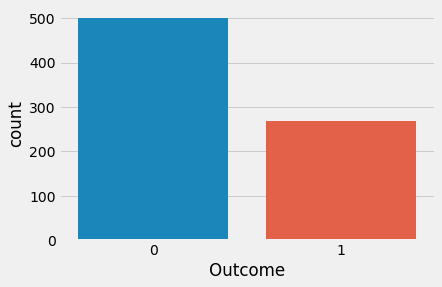

In [6]:
sns.countplot(x='Outcome',data=diab)
plt.show()

Basic stat summary of the feature columns against the Outcome column to see any differences between having and not having diabetes.  
We can notice some mean differences between having diabetes and no diabetes (may not be statistically significant within certain confidence level). It will be difficult to judge though if you have many more columns.

In [103]:
grouped = diab.groupby('Outcome').agg({'Pregnancies':['mean', 'std', min, max], 
                                       'Glucose':['mean', 'std', min, max],
                                       'BloodPressure':['mean', 'std', min, max],
                                       'SkinThickness':['mean', 'std', min, max],
                                       'Insulin':['mean', 'std', min, max],
                                       'BMI':['mean', 'std', min, max],
                                       'DiabetesPedigreeFunction':['mean', 'std', min, max],
                                       'Age':['mean', 'std', min, max]
                                      })
grouped.columns = ["_".join(x) for x in grouped.columns.ravel()]
grouped # or grouped.T

,Pregnancies_mean,Pregnancies_std,Pregnancies_min,Pregnancies_max,Glucose_mean,Glucose_std,Glucose_min,Glucose_max,BloodPressure_mean,BloodPressure_std,...,BMI_min,BMI_max,DiabetesPedigreeFunction_mean,DiabetesPedigreeFunction_std,DiabetesPedigreeFunction_min,DiabetesPedigreeFunction_max,Age_mean,Age_std,Age_min,Age_max
Outcome,,,,,,,,,,,,,,,,,,,,,
0,3.298000,3.017185,0,13,109.980000,26.141200,0,197,68.184000,18.063075,...,0.0,57.3,0.429734,0.299085,0.078,2.329,31.190000,11.667655,21,81
1,4.865672,3.741239,0,17,141.257463,31.939622,0,199,70.824627,21.491812,...,0.0,67.1,0.550500,0.372354,0.088,2.420,37.067164,10.968254,21,70


Let us have look at the distribution of the features grouping them by the Outcome column.  
Outcome 0 is no diabetes, 1 is with diabetes.

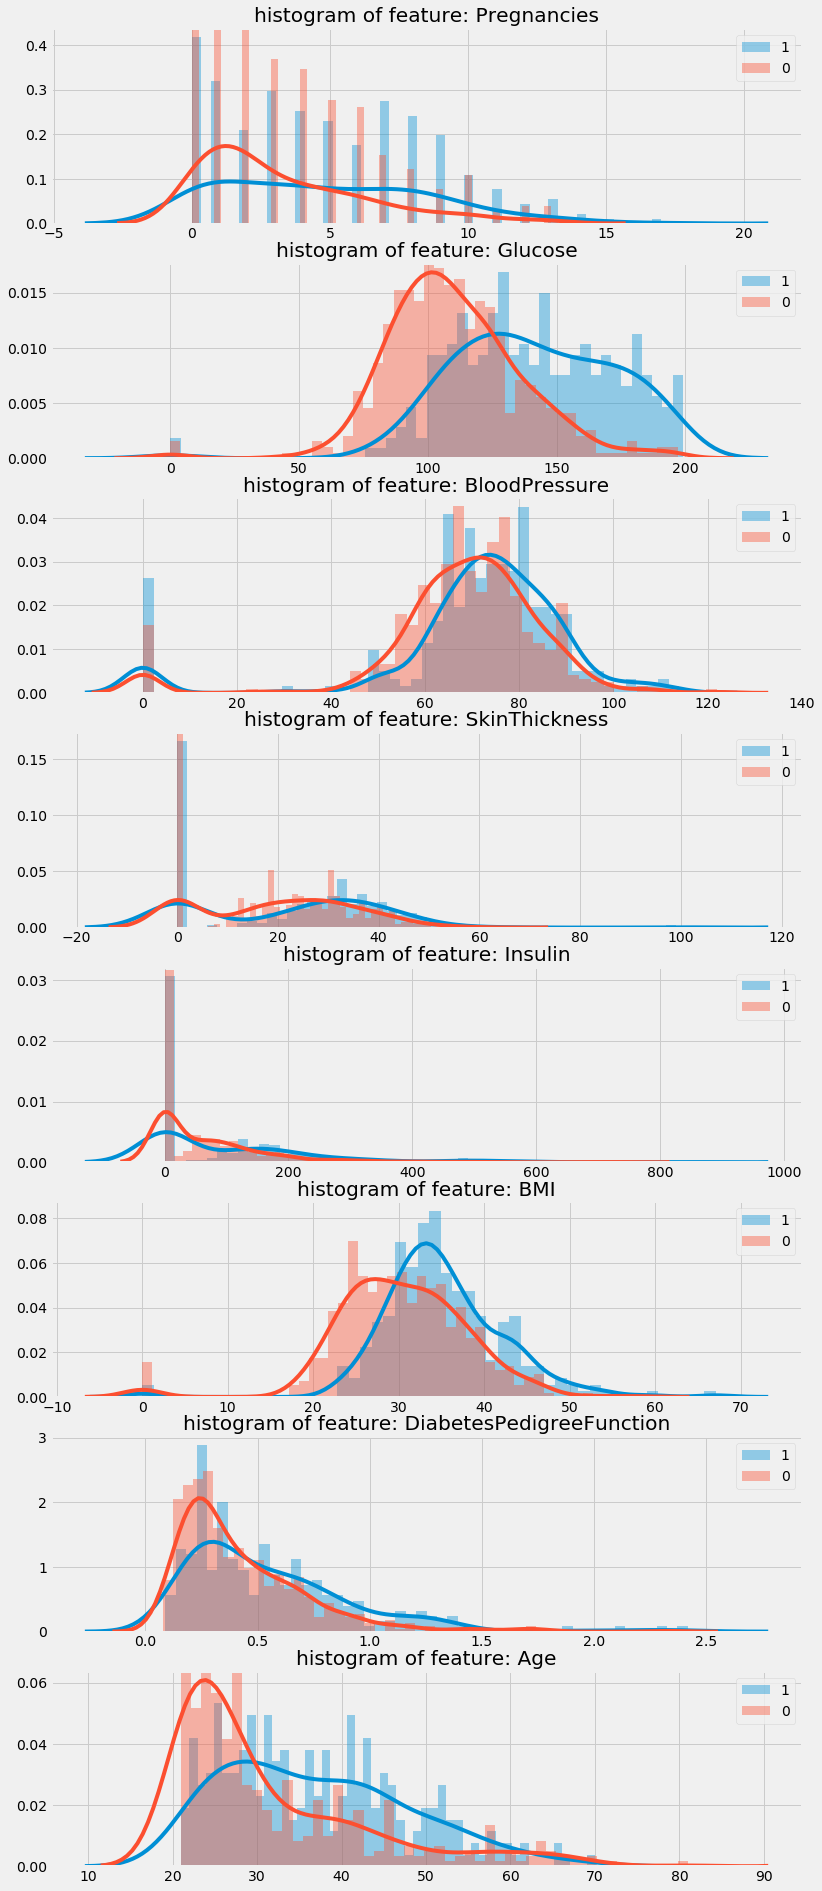

In [80]:
columns=diab.columns[:8]
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(diab[columns]):
    ax = plt.subplot(gs[i])
    sns.distplot(diab[cn][diab.Outcome == 1], bins=50)
    sns.distplot(diab[cn][diab.Outcome == 0], bins=50)
    ax.set_xlabel('')
    plt.legend(diab["Outcome"])
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

Distribution of diabetes cases are overall similar to distribution of non-diabetes distribution in each feature. No single parameter can explain the difference betweeen diabetes and non-diabetes. 

## Correlation matrix

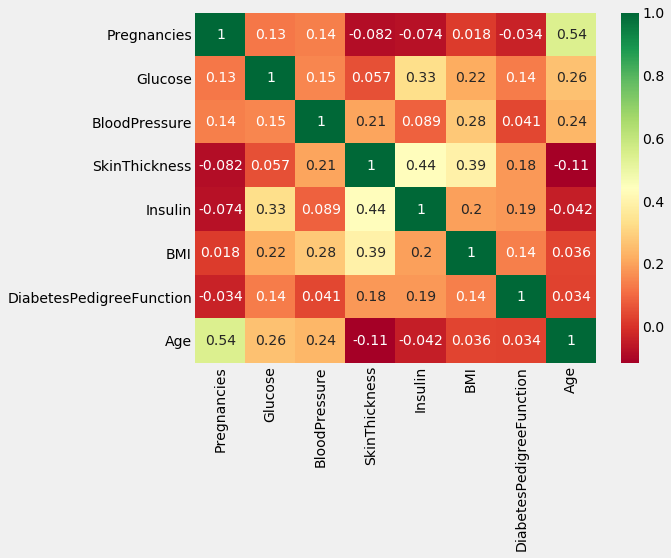

In [11]:
sns.heatmap(diab[diab.columns[:8]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

Input parameters are not highly correlated. So we can keep all the parameters for the model. 
Another way to look at it is by doing pair plots.

In [101]:
#sns.pairplot(data=diab,hue='Outcome',diag_kind='kde')
#plt.show()

# Proceed to model building

In [13]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

Split into train and test **stratify**ing the 'Outcome' column.  
This guarantees the train-test split ratio in the 'Outcome' column both in the training set and the testing set. 

In [14]:
outcome=diab['Outcome']
data=diab[diab.columns[:8]]
train,test=train_test_split(diab,test_size=0.25,random_state=0,stratify=diab['Outcome'])# stratify the outcome
train_X=train[train.columns[:8]]
test_X=test[test.columns[:8]]
train_Y=train['Outcome']
test_Y=test['Outcome']

In [15]:
# Confirm the rain-test split ratio
print(len(train_X))
print(len(train_Y))
print(len(test_X))
print(len(test_Y))

576
576
192
192


### Feature Centering and Scaling

train_X and test_X datasets are centered to zero and normalized by the std dev. This helps in faster gradient descent.

In [16]:
features = train_X.columns.values

for feature in features:
    mean, std = diab[feature].mean(), diab[feature].std()
    train_X.loc[:, feature] = (train_X[feature] - mean) / std
    test_X.loc[:, feature] = (test_X[feature] - mean) / std


### Logistic regression

In [17]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_Y))

The accuracy of the Logistic Regression is 0.78125


### Decision tree

In [18]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_Y))

The accuracy of the Decision Tree is 0.755208333333


### K-nearest neighbors

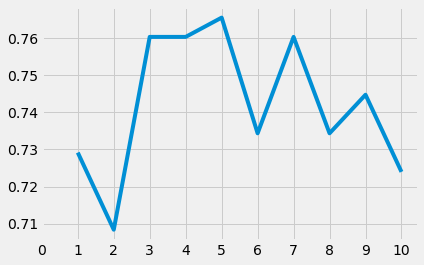

Accuracies for different values of n are: [ 0.72916667  0.70833333  0.76041667  0.76041667  0.765625    0.734375
  0.76041667  0.734375    0.74479167  0.72395833]


In [19]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
plt.show()
print('Accuracies for different values of n are:',a.values)

### SVM

In [20]:
types=['rbf','linear']
for i in types:
    model=svm.SVC(kernel=i)
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    print('Accuracy for SVM kernel=',i,'is',metrics.accuracy_score(prediction,test_Y))

Accuracy for SVM kernel= rbf is 0.776041666667
Accuracy for SVM kernel= linear is 0.770833333333


### Random forest classifier

In [21]:
model= RandomForestClassifier(n_estimators=100,random_state=0)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy of the Random forest classifier is',metrics.accuracy_score(prediction,test_Y))

The accuracy of the Random forest classifier is 0.807291666667


Let us compare al the models for their accuracy:


In [22]:
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree', 'Random forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier(), RandomForestClassifier(n_estimators=100,random_state=0)]
for i in models:
    model = i
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    abc.append(metrics.accuracy_score(prediction,test_Y))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe.sort_values(['Accuracy'], ascending=[0])

,Accuracy
Random forest,0.807292
Logistic Regression,0.781250
Radial Svm,0.776042
Linear Svm,0.770833
KNN,0.760417
Decision Tree,0.760417


We see that random forest classifier has better accuracy of 80.72%. Next, logistic regression and linear SVM has similar accuracy of more than 77%.
Let us look at the featureimportance in Random forest classifier.

In [23]:
modelRF= RandomForestClassifier(n_estimators=100,random_state=0)
modelRF.fit(train_X,train_Y)
prediction=modelRF.predict(test_X)
pd.Series(modelRF.feature_importances_,index=train_X.columns).sort_values(ascending=False)

Glucose                     0.248259
BMI                         0.155331
Age                         0.147476
DiabetesPedigreeFunction    0.129128
BloodPressure               0.086639
Pregnancies                 0.081182
SkinThickness               0.078891
Insulin                     0.073094
dtype: float64

Top five important features are 'Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction' and 'Blood pressure'. Next, pregnancies (only in case of women) have higher chances of diabetes.

Let us look at the confusion matrix from Random Forest classifier:

In [24]:
cmRF = metrics.confusion_matrix(test_Y, prediction, labels=None, sample_weight=None)
pd.DataFrame(cmRF)

,0,1
0,110,15
1,22,45


In [25]:
ind=['True Neg', 'True Pos'] 
cols=['Pred Neg', 'Pred Pos']
cmRF = pd.DataFrame(cmRF, index=ind, columns=cols)
pd.DataFrame(cmRF)

,Pred Neg,Pred Pos
True Neg,110,15
True Pos,22,45


In [26]:
def Precision(cm):
     # prec = TP / (TP + FP)
    try:
        return round((cm.iloc[1,1]) / (cm.iloc[0,1] + cm.iloc[1,1]), 3)
    except ZeroDivisionError:
        return 1.0
    
def Recall(cm):
    # prec = TP / (TP + FN)
    try:
        return round((cm.iloc[1,1]) / (cm.iloc[1,0] + cm.iloc[1,1]), 3)
    except ZeroDivisionError:
        return 1.0
    
def Specificity(cm):
    # prec = TP / (TP + FN)
    try:
        return round((cm.iloc[0,0]) / (cm.iloc[0,0] + cm.iloc[0,1]), 3)
    except ZeroDivisionError:
        return 1.0

In [27]:
print('TN: ', cmRF.iloc[0,0]) 
print('TP: ', cmRF.iloc[1,1])
print('FN: ', cmRF.iloc[1,0]) 
print('FP: ', cmRF.iloc[0,1]) 
print ('When predicted positive is correct, Precision: ', round(Precision(cmRF), 3))
print ('True positive rate, Recall or sensitivity: ', round(Recall(cmRF), 3))
print ('How often predicted negative is correct, specificity: ', round(Specificity(cmRF), 3))

TN:  110
TP:  45
FN:  22
FP:  15
When predicted positive is correct, Precision:  0.75
True positive rate, Recall or sensitivity:  0.672
How often predicted negative is correct, specificity:  0.88


The model has higher specificity that is, it did good job in predicting negative. It is more accurate when it predicts to have no diabetes (88% of the times) but less accurate when predicts to have diabetes (67.2%).

### Cross validation

Most of the time, the dataset has imbalance in classes, say one or more class(es) has higher instances than the other classes. In that case, we should train the model in each and every instances of the dataset. After that we take average of all the noted accuracies over the dataset. 

1. For a K-fold cross validation, we first divide the dataset into K subsets. 
2. Then we train on K-1 parts and test on the remainig 1 part. 
3. We continue to do that by taking each part as testing and training on the remaining K-1. Accuracies and errors are then averaged to get an average accuracy of the algorithm.
4. For certain subset the algorithm will underfit while for a certain other it will overfit. With K-fold cross validation we achieve a generalized model.

Below we approach the K-fold cross validation for this dataset.

In [28]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.preprocessing import StandardScaler #Standardisation

In [29]:
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts

In [30]:
# Starting with the original dataset and then doing centering and scaling
features=diab[diab.columns[:8]]
features_standard=StandardScaler().fit_transform(features)# Gaussian Standardisation
X=pd.DataFrame(features_standard,columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                                          'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X['Outcome']=diab['Outcome']

In [31]:
xyz=[]
accuracy=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree', 'Random forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier(), RandomForestClassifier(n_estimators=100,random_state=0)]

for i in models:
    model = i
    cv_result = cross_val_score(model,X[X.columns[:8]], X['Outcome'], cv = kfold, scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    accuracy.append(cv_result)

cv_models_dataframe=pd.DataFrame(abc, index=classifiers)   
cv_models_dataframe.columns=['CV Mean']    
cv_models_dataframe
cv_models_dataframe.sort_values(['CV Mean'], ascending=[0])

,CV Mean
Random forest,0.807292
Logistic Regression,0.781250
Radial Svm,0.776042
Linear Svm,0.770833
KNN,0.760417
Decision Tree,0.760417


In [32]:
box=pd.DataFrame(accuracy,index=[classifiers])
boxT = box.T
#boxT

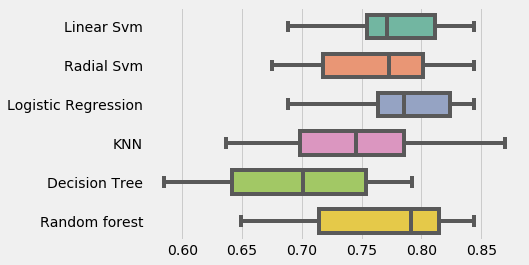

In [33]:
ax = sns.boxplot(data=boxT, orient="h", palette="Set2", width=.6)
plt.show()

The above plots shows that Linear SVM and Logistic Regression performs better in cross validation while tree based methods, Decision Tree and Random Forrest are worse (wider distribution).

## Ensembling

In ensemble methods, we create multiple models and then combine them that gives us better results. Enseble methods typically gives better accuracy than a single model. The models used to create such ensemble models are called base models.  

Let us do ensembling with **Voting Ensemble**. First we create two or more standalone models on the training dataset. A voting classifier wrap the models to get average predictions. Models with higher individual accuracies are weighted higher.  

Since KNN, Decision Tree and Random Forest models have wide range of accuracies in K-fold validation, they are not considered in ensembling the models.

Other the models: Linear SVM, Radial SVM and Logistic Regression are combined together to get an ensemble model.

In [34]:
linear_svc=svm.SVC(kernel='linear',C=0.1,gamma=10,probability=True)
radial_svm=svm.SVC(kernel='rbf',C=0.1,gamma=10,probability=True)
lr=LogisticRegression(C=0.1)

In [35]:
from sklearn.ensemble import VotingClassifier #for Voting Classifier

#### All 3 classifiers combined

In [36]:
ensemble_rad_lr_lin=VotingClassifier(estimators=[('Radial_svm', radial_svm), 
                                                 ('Logistic Regression', lr),
                                                 ('Linear_svm',linear_svc)], 
                       voting='soft', weights=[2,1,3]).fit(train_X,train_Y)

In [37]:
print('The ensembled model with all the 3 classifiers is:', round(ensemble_rad_lr_lin.score(test_X,test_Y), 4))

The ensembled model with all the 3 classifiers is: 0.7865


In [38]:
predEN = ensemble_rad_lr_lin.predict(test_X)
cmEN = metrics.confusion_matrix(test_Y, predEN, labels=None, sample_weight=None)
print ('Confusion matrix with ensemble method: \n ')
cmEN = pd.DataFrame(cmEN)
cmEN

Confusion matrix with ensemble method: 
 


,0,1
0,115,10
1,31,36


In [39]:
print ('Precision: ', Precision(cmEN))
print ('Recall: ', Recall(cmEN))
print ('Specificity: ', Specificity(cmEN))

Precision:  0.783
Recall:  0.537
Specificity:  0.92


Out of all having diabetes, ensemble model is able to predict 53.7% correctly to have diabetes which is still low and is going to need improvement.  
In this case, definitely I would collect more data and also further explore the misclassification error. 

## Diabetes prediction using Neural Network with Keras

Keras is a high level frame work for running neural network applications. It runs tensorflow at the backend.  
Below I practiced applying fully connected neural network in Keras and directly in Tensowflow using relatively small network.  
This Diabetes dataset is small for neural network applications and to get a better accuracy. 
I believe the **ensemble model** above is better approach for this dataset.

In [40]:
from keras.models import Sequential
from keras.layers import Dense
# fix random seed for reproducibility
np.random.seed(7)

Using TensorFlow backend.


### 1. Create the model using Keras

input_dim = 8 since we have 8 input variable.  
Here we are using 5 fully connected layers defined by using the Dense class (no particular reason for 5 layers, typically more layers are better). 
Number of neurons in the layers are the first argument (8, 12, 12, 8, 4 & 1 respecitvely here).  
We use the default weight initialization in Keras which is between 0 to 0.05 assuming "uniform" distribution.  
First 4 layers have "relu" activation and output layer has "sigmoid" activation. Sigmoid on the output layer ensures that we have output between 0  and 1.  

We can piece it all together by adding each layer.

In [41]:
model = Sequential()
model.add(Dense(8, input_dim=8, activation='relu'))
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### 2. Compile the model


Now the model is ready, we can compile it (using tensorflow under the hood or backend) and train it find the best weights for prediction. 
loss='binary_crossentropy' since the problem is binary classification.  
optimizer='adam' since it is efficient and default default.  
From metrics we collect the accuracy.

In [42]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### 3. Fit model

We train the model by calling fit() on training data.  
The number of iteration through the whole training datset is called "epoch". It is set to 150 (higher the better).  
The number of instances that are evaluated before a weight update in the network is performed is the the batch size. It is set to 50 (relatively small, the dataset is also small).  

With the model.fit(), we shall also capture the accuracy each epoch.

In [43]:
epoch = 150
batch_size = 50

model.fit(train_X,train_Y, epochs=epoch, batch_size=batch_size)

Epoch 1/150
576/576 [==============================] - 1s 1ms/step - loss: 0.6920 - acc: 0.5764
Epoch 2/150
576/576 [==============================] - 0s 31us/step - loss: 0.6852 - acc: 0.6493
Epoch 3/150
576/576 [==============================] - 0s 30us/step - loss: 0.6758 - acc: 0.6510
Epoch 4/150
576/576 [==============================] - 0s 30us/step - loss: 0.6643 - acc: 0.6510
Epoch 5/150
576/576 [==============================] - 0s 30us/step - loss: 0.6507 - acc: 0.6510
Epoch 6/150
576/576 [==============================] - 0s 45us/step - loss: 0.6317 - acc: 0.6510

We see that the model accuracy hovers around 82-85% in the training data which is not better than ensemble model (accuracy may change slightly run-to-run). We can try larger network inclear number of epochs however, very likely this is the maximum prediction or performance of the model based on the dataset. We may also end of overfitting the training dataset. Again, note that the dataset is relatively small for neural network. 

### 4 Evaluate model

We evaluate the model on test dataset and obtain the score and accuracy.  
Score is the evaluation of the loss function for a given input.

In [44]:
score, acc = model.evaluate(test_X, test_Y)
print('Test score:', score)
print('Test accuracy:', acc)

192/192 [==============================] - 0s 162us/step
Test score: 0.487177615364
Test accuracy: 0.776041666667


So we get 79.16% accuracy on the test dataset with this fully connected neural network (varies little bit run to run).  
This is **not significantly better than ensemble method** done earlier.  
NN acccuracy expected to improve with larger amount of training data.

In [45]:
from sklearn.metrics import confusion_matrix,classification_report

In [46]:
predictions = model.predict_classes(test_X)
print(classification_report(test_Y, predictions))

             precision    recall  f1-score   support

          0       0.83      0.83      0.83       125
          1       0.68      0.67      0.68        67

avg / total       0.78      0.78      0.78       192



## Diabetes prediction using tensorflow

Setting up tensorflow which is Keras backend for the prediction and see what we get. Tensorflow has more flexibility to set up NN hyperparameters. I am setting up the same network in Tensorflow as in Keras. 

In [47]:
import tensorflow as tf

Creatng a NotDiabetes column from Outcome to convert single class to double class.

In [48]:
diab['NotDiabetes'] = 1 - diab['Outcome']

In [49]:
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NotDiabetes
0,6,148,72,35,0,33.6,0.627,50,1,0
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,1,0
3,1,89,66,23,94,28.1,0.167,21,0,1
4,0,137,40,35,168,43.1,2.288,33,1,0


In [50]:
# Train-test split

train,test=train_test_split(diab,test_size=0.25,random_state=0,stratify=diab['Outcome']) # stratify the outcome
X_train = train[train.columns[:8]]
X_test = test[test.columns[:8]]
Y_train = train[['Outcome', 'NotDiabetes']]
Y_test = test[['Outcome', 'NotDiabetes']]

In [51]:
# Confirm the rain-test split ratio
print(np.shape(X_train))
print(np.shape(Y_train))
print(np.shape(X_test))
print(np.shape(Y_test))

(576, 8)
(576, 2)
(192, 8)
(192, 2)


#### Hyerparameter set up in tensorflow

Learning rate, number of epochs, batch size, number of hidden layers and number of neurons in each layer are set up as below.  
6 hidden layers are used, last layer as output layers with different numbers of neurons in each layer.  
Dropout is set as 0.9 (90% of training data is used in case of drop out). Drop out improves accuracy in training.

In [52]:
learning_rate = 0.005

# Parameters

training_epochs = 50
batch_size = 50
display_step = 5

# Neural Network Parameters:
# Hidden layers, input parameters, output classes, dropouts

n_hidden_1 = 8
n_hidden_2 = 12
n_hidden_3 = 12
n_hidden_4 = 8
n_hidden_5 = 4
n_hidden_6 = 1
n_input = X_train.shape[1]
n_classes = Y_train.shape[1]
dropout = 0.9

#### Create TensorFlow varaibles as placeholders

In [53]:
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float")
keep_prob = tf.placeholder(tf.float32)

#### Set up NN model with weights and bias (y=Wx+b)

Create a neural network function to apply on dataset 'x'. Define each layer with weights, biases, dropouts. This function outputs the last layer which has 2 outputs. Last layer has [sigmoid](https://www.tensorflow.org/api_docs/python/tf/sigmoid) activation and other layers have [relu](https://www.tensorflow.org/api_docs/python/tf/nn/relu) activation. Also check [tf.variable](https://www.tensorflow.org/api_docs/python/tf/Variable).

In [54]:
def neural_network(x, weights, biases, dropout):
    # Hidden layer with relu activation
    
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)

    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
    
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
    
    layer_5 = tf.add(tf.matmul(layer_4, weights['h5']), biases['b5'])
    layer_5 = tf.nn.relu(layer_5)  # Sigmoid for binary classification 
    
    layer_6 = tf.add(tf.matmul(layer_5, weights['h6']), biases['b6'])
    layer_6 = tf.nn.sigmoid(layer_6)  # Sigmoid for binary classification

    out_layer = tf.matmul(layer_6, weights['out']) + biases['out']

    #out_layer = tf.nn.dropout(out_layer, dropout)
    return out_layer

# Layers weight and bias

weights = {
    'h1': tf.Variable(tf.random_uniform(shape=(n_input,n_hidden_1),minval=0, maxval=0.005, dtype=tf.float32, seed=0)),
    'h2': tf.Variable(tf.random_uniform(shape=(n_hidden_1, n_hidden_2),minval=0, maxval=0.005, dtype=tf.float32, seed=0)),
    'h3': tf.Variable(tf.random_uniform(shape=(n_hidden_2, n_hidden_3),minval=0, maxval=0.005, dtype=tf.float32, seed=0)),
    'h4': tf.Variable(tf.random_uniform(shape=(n_hidden_3, n_hidden_4),minval=0, maxval=0.005, dtype=tf.float32, seed=0)),
    'h5': tf.Variable(tf.random_uniform(shape=(n_hidden_4, n_hidden_5),minval=0, maxval=0.005, dtype=tf.float32, seed=0)),
    'h6': tf.Variable(tf.random_uniform(shape=(n_hidden_5, n_hidden_6),minval=0, maxval=0.005, dtype=tf.float32, seed=0)),
    'out': tf.Variable(tf.random_uniform(shape=(n_hidden_6, n_classes),minval=0, maxval=0.005, dtype=tf.float32, seed=0))
}

biases = {
    'b1': tf.Variable(tf.random_uniform([n_hidden_1])),
    'b2': tf.Variable(tf.random_uniform([n_hidden_2])),
    'b3': tf.Variable(tf.random_uniform([n_hidden_3])),
    'b4': tf.Variable(tf.random_uniform([n_hidden_4])),
    'b5': tf.Variable(tf.random_uniform([n_hidden_5])),
    'b6': tf.Variable(tf.random_uniform([n_hidden_6])),
    'out': tf.Variable(tf.random_uniform([n_classes]))
}

#### Cost, Optimizer, Prediction and Accuracy based on the model
Get the model applying the neural network function above with weights, biases and drop outs to input dataset x (not the training dataset yet).  
We are using L2 regularization ([tf.nn.l2_loss](https://www.tensorflow.org/api_docs/python/tf/nn/l2_loss)) for the cost since the output is binary. Regularization penalizes the weights to improve accuracy.  
We choose [Adam Optimizer](https://www.tensorflow.org/api_docs/python/tf/train/AdamOptimizer) to minimize cost. Then we define what is going to be the prediction based on the model and then collect accuracy.  
Check [tf.equal](https://www.tensorflow.org/api_docs/python/tf/equal), [tf.argmax](https://www.tensorflow.org/api_docs/python/tf/argmax), [tf.reduce_mean](https://www.tensorflow.org/api_docs/python/tf/reduce_mean)

In [55]:
# Constructing model
NNModelTF = neural_network(x, weights, biases, keep_prob)

# Defining loss and optimizer
cost = tf.nn.l2_loss(tf.nn.softmax_cross_entropy_with_logits(logits=NNModelTF, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Prediction
correctPred = tf.equal(tf.argmax(NNModelTF, 1), tf.argmax(y, 1))

# Accuracy
calcAcc = tf.reduce_mean(tf.cast(correctPred, tf.float32))

### Tensorflow session

We obtain cost and accuracy in one Session

In [56]:
# To record accuracy and cost for plot

TrainAccSummary = [] 
TrainCostSummary = [] 
TestAccSummary = [] 
TestCostSummary = [] 

In [57]:
# Initializing the variables
init = tf.global_variables_initializer()

In [58]:
# Tensorflow session

with tf.Session() as sess:
    sess.run(init)
    # Training cycle
    for epoch in range(training_epochs):
        #avg_cost = 0.
        total_batch = int(len(X_train) / batch_size)

        X_batches = np.array_split(X_train, total_batch)
        Y_batches = np.array_split(Y_train, total_batch)

        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = X_batches[i], Y_batches[i]
            # Run optimization operation (backprop) and cost operation(to get loss value)
            sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})
            # Compute average loss
            # avg_cost += c / total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            TrainAcc, TrainCost = sess.run([calcAcc, cost], feed_dict={x: X_train, y: Y_train})
            TestAcc, TestCost = sess.run([calcAcc, cost], feed_dict={x: X_test, y: Y_test})
            
            print("Epoch: ", epoch,
                  "Training Accuracy: ", round(TrainAcc, 4), 
                  "Training cost: ", round(TrainCost, 4),
                  "Test Accuracy: ", round(TestAcc, 4),
                  "Test cost: ", round(TestCost, 4),
                 )
            
            TrainAccSummary.append(TrainAcc)
            TrainCostSummary.append(TrainCost)
            TestAccSummary.append(TestAcc)
            TestCostSummary.append(TestCost)

Epoch:  0 Training Accuracy:  0.349 Training cost:  141.598 Test Accuracy:  0.349 Test cost:  47.1983
Epoch:  5 Training Accuracy:  0.651 Training cost:  130.751 Test Accuracy:  0.651 Test cost:  43.5836
Epoch:  10 Training Accuracy:  0.651 Training cost:  130.751 Test Accuracy:  0.651 Test cost:  43.5835
Epoch:  15 Training Accuracy:  0.651 Training cost:  130.751 Test Accuracy:  0.651 Test cost:  43.5836
Epoch:  20 Training Accuracy:  0.651 Training cost:  130.751 Test Accuracy:  0.651 Test cost:  43.5837
Epoch:  25 Training Accuracy:  0.651 Training cost:  130.751 Test Accuracy:  0.651 Test cost:  43.5837
Epoch:  30 Training Accuracy:  0.651 Training cost:  130.751 Test Accuracy:  0.651 Test cost:  43.5837
Epoch:  35 Training Accuracy:  0.651 Training cost:  130.751 Test Accuracy:  0.651 Test cost:  43.5837
Epoch:  40 Training Accuracy:  0.651 Training cost:  130.751 Test Accuracy:  0.651 Test cost:  43.5837
Epoch:  45 Training Accuracy:  0.651 Training cost:  130.751 Test Accuracy:

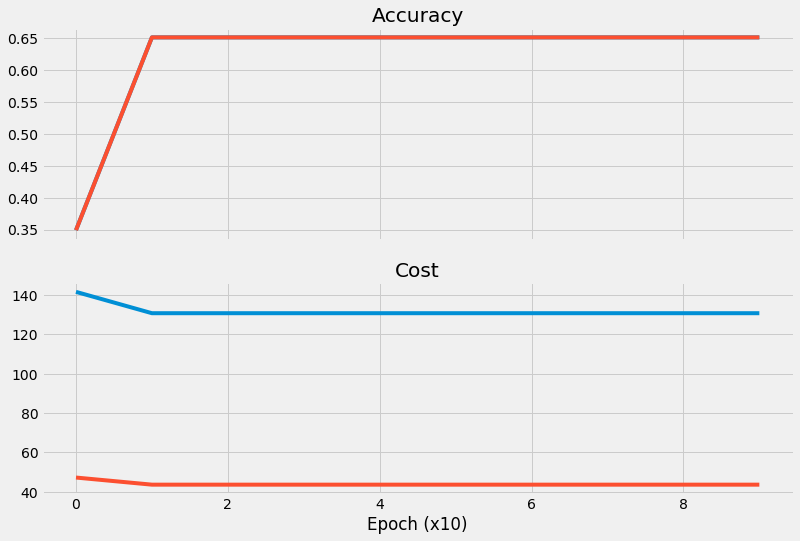

In [59]:
# Plot accoracy and cost

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,8))

ax1.plot(TrainAccSummary) # blue
ax1.plot(TestAccSummary) # green
ax1.set_title('Accuracy')

ax2.plot(TrainCostSummary)
ax2.plot(TestCostSummary)
ax2.set_title('Cost')

plt.xlabel('Epoch (x10)')
plt.show()

For these small number of epochs, drops in cost is small and improvement in accuracy is not noticeable.  
Larger dataset is desired to improve accuracy with this neural nets setup in this case.  

### Conclusion

* Close to 80% accuracy is obtained based on this dataset to predict diabetes in a person using ensemble method among different methods evalauted.  
* Confusion matrix showed the model to predict non-diabetic more accurately than diabetic (92% vs. 53.7%) which need improvement.
* More data and prediction with NN model is expected to improve accuracy.

### References

* [An Introduction to Statistical Learning](https://link.springer.com/book/10.1007%2F978-1-4614-7138-7) by Hastie & Tibshirani
 
* Kaggle notebook by [I, coder](https://www.kaggle.com/ash316/ml-from-scratch-part-2). Thanks to him for the lessons on ML from scratch.

* Kaggle notebook by [Currie32](https://www.kaggle.com/currie32/predicting-fraud-with-tensorflow) (Thank you) on tensorflow implementation.

* [Useful link for Keras and other application](https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/) by ML mastery, one of the other online useful links.